# First look at clubs dataset

In [1]:
import sys
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sys.path.insert(0, r'..\src\data')
import ftb_clubs_wrangle as ftb

In [2]:
fulldata = ftb.get_master("fulldata")
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290074 entries, 0 to 290073
Data columns (total 92 columns):
Unnamed: 0               290074 non-null int64
Attendance               9326 non-null float64
BookingPoints            9330 non-null float64
BookingPointsOpp         9330 non-null float64
Corners                  110686 non-null float64
CornersOpp               110686 non-null float64
Country                  290074 non-null object
Date                     290074 non-null object
Div                      290074 non-null object
Fouls                    109918 non-null float64
FoulsOpp                 109918 non-null float64
Goals                    290070 non-null float64
Goals1stHalf             250396 non-null float64
Goals1stHalfOpp          250396 non-null float64
GoalsOpp                 290070 non-null float64
HomeAway                 290074 non-null object
Offsides                 9314 non-null float64
OffsidesOpp              9314 non-null float64
RedCards               

In [3]:
fulldata.HomeAway.value_counts()

Home    145037
Away    145037
Name: HomeAway, dtype: int64

Note this dataset double counts matches because each match will occur as "Home" and "Away" entries.

In [4]:
pd.crosstab(fulldata.Season, fulldata.Country, margins=True)

Country,Belgium,England,France,Germany,Greece,Holland,Italy,Portugal,Scotland,Spain,Turkey,All
Season,,,,,,,,,,,,
1993-1994,0,2372,760,1372,0,612,612,0,0,760,0,6488
1994-1995,0,2516,760,1224,612,612,612,612,720,760,612,9040
1995-1996,612,2368,760,1224,612,612,612,612,720,924,612,9668
1996-1997,612,2314,1684,1224,612,612,612,612,720,1684,612,11298
1997-1998,612,2338,1536,1224,612,612,1372,612,1440,1684,612,12654
1998-1999,612,2264,1372,1224,612,612,1372,612,1440,1684,612,12416
1999-2000,612,2272,1372,1224,612,612,1372,612,1440,1684,612,12424
2000-2001,612,3126,1372,0,480,612,1372,612,1536,1684,612,12018
2001-2002,612,3138,612,0,364,612,612,612,1536,760,612,9470


So we clearly have some incomplete data - particularly for early 2000s.

Also the English data has far too volatile count. I suspect my pre-processing is re-arranging the data in unexpected days.

Let's make a note to investigate those issues but carry on with our initial analysis...

<Figure size 432x288 with 0 Axes>

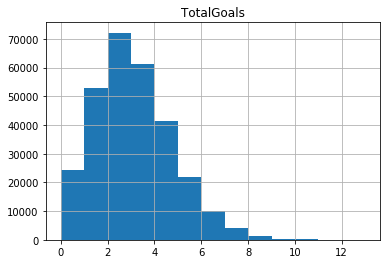

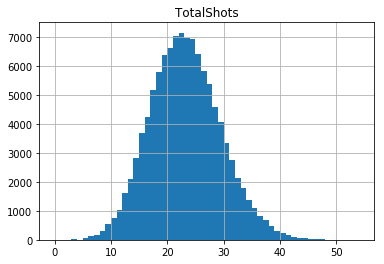

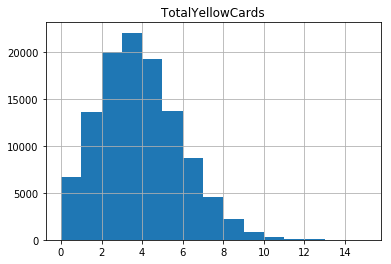

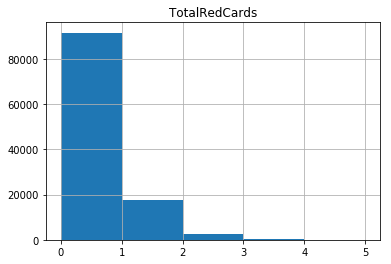

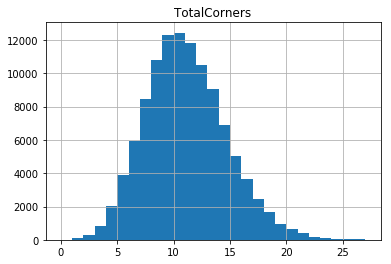

In [5]:
plt.figure();
hist_metrics = ["TotalGoals", "TotalShots", "TotalYellowCards", "TotalRedCards", "TotalCorners"]
for item in hist_metrics:
#     print fulldata[item].max()+1
    fulldata.hist(column=[item], bins=range(int(fulldata[item].max()+1)))

In [6]:
fulldata[fulldata.HomeAway=="Home"].Result.value_counts(normalize=True)

Win     0.457456
Loss    0.274613
Draw    0.267932
Name: Result, dtype: float64

## Spot checks on Ajax

Let's take Ajax as an example and check that their season performances do match those here https://en.wikipedia.org/wiki/List_of_AFC_Ajax_seasons

In [7]:
group_key = "Season"
base_filters = {
        "Team": ["Ajax"]
        }
output_metrics = [
        "NumberOfMatches",
        "Win", "Draw", "Loss",
        "Goals", "GoalsOpp", 
        ]
ajax = ftb.get_summary(group_key, df=None, base_filters=base_filters, 
                       output_metrics=output_metrics, agg_method=sum)
ajax

,NumberOfMatches,Win,Draw,Loss,Goals,GoalsOpp
1993-1994,34,26,2,6,86.0,26.0
1994-1995,34,27,7,0,106.0,28.0
1995-1996,34,26,5,3,97.0,24.0
1996-1997,34,17,10,7,55.0,31.0
1997-1998,34,29,2,3,112.0,22.0
1998-1999,34,16,9,9,73.0,41.0
1999-2000,34,18,7,9,72.0,51.0
2000-2001,34,18,7,9,85.0,43.0
2001-2002,34,22,7,5,73.0,34.0
2003-2004,34,25,5,4,79.0,31.0


So (pretty much it all matches up. Missing seasons are 2002-2003, 2004-2005, 2007-2008. Also curiously we're missing one game from 2010-2011 - a 3-1 win?

## Spot checks on Frankfurt

Let's take Eintracht Frankfurt as a second example and check them out versus https://en.wikipedia.org/wiki/List_of_Eintracht_Frankfurt_seasons

In [8]:
group_key = "Season"
base_filters = {
        "Team": ["Ein Frankfurt"]
        }
output_metrics = [
        "NumberOfMatches",
        "Win", "Draw", "Loss",
        "Goals", "GoalsOpp", 
        ]
frankfurt = ftb.get_summary(group_key, df=fulldata.copy(), base_filters=base_filters, 
                       output_metrics=output_metrics, agg_method=sum)
frankfurt

,NumberOfMatches,Win,Draw,Loss,Goals,GoalsOpp
1993-1994,34,15,8,11,57.0,41.0
1994-1995,34,12,9,13,41.0,49.0
1995-1996,34,7,11,16,43.0,68.0
1996-1997,34,13,9,12,43.0,46.0
1997-1998,34,17,13,4,50.0,32.0
1998-1999,34,9,10,15,44.0,54.0
1999-2000,34,12,5,17,42.0,44.0
2005-2006,34,9,9,16,42.0,51.0
2006-2007,34,9,13,12,46.0,58.0
2007-2008,34,12,10,12,43.0,50.0


Again, it's mostly spot-on. This time missing years are 2000-2001, 2001-2002, 2002-2003, 2003-2004, 2004-2005, and in 2010-2011 we have 3 extra goals conceded appearing!

## Mapping the data

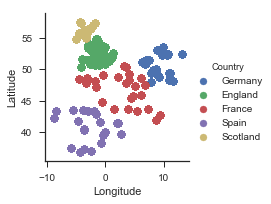

In [9]:
import seaborn
seaborn.set(style='ticks')

mapdata=fulldata.dropna(subset=['Latitude', 'Longitude'])
# mapdata.info()
fg = seaborn.FacetGrid(data=mapdata, hue='Country', aspect=1.)
fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()

In [10]:
fulldata[fulldata.City=="London "].groupby(['Stadium'])[["Latitude","Longitude"]].max()

,Latitude,Longitude
Stadium,,
Boleyn Ground,51.531944,0.039444
Craven Cottage,51.475000,-0.221667
Emirates Stadium,51.555000,-0.108611
Griffin Park,51.488183,-0.302639
Loftus Road,51.509167,-0.232222
Selhurst Park,51.398333,-0.085556
Stamford Bridge,51.481667,-0.191111
The Den,51.485953,-0.050950
White Hart Lane,51.603333,-0.065833


In [11]:
# Extract the data we're interested in
lat = fulldata.groupby(['Stadium'])[["Latitude"]].max().values
lon = fulldata.groupby(['Stadium'])[["Longitude"]].max().values

# print lat, lon


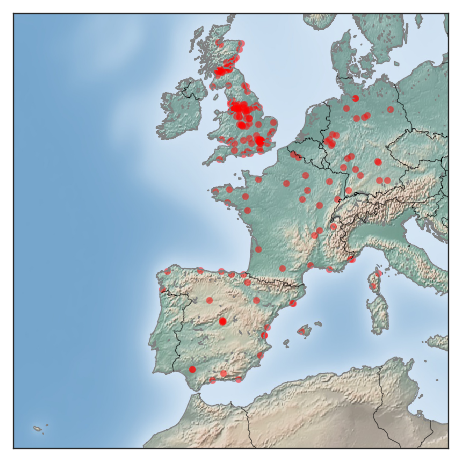

In [12]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=46., lon_0=-3.,
            width=3E6, height=3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')

# 2. scatter stadium data
m.scatter(lon, lat, latlon=True,
          color='r', s=40,
          alpha=0.5)
